<a href="https://colab.research.google.com/github/sid0312/face_keypoints/blob/master/facial_keypoint_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /drive


In [0]:
!mkdir face

In [4]:
!unzip '/drive/My Drive/face_tasks/face-keypoints.zip' -d '/content/face'

Streaming output truncated to the last 5000 lines.
  inflating: /content/face/facial-keypoints/data/images/01008.jpg  
  inflating: /content/face/facial-keypoints/data/images/01009.jpg  
  inflating: /content/face/facial-keypoints/data/images/01010.jpg  
  inflating: /content/face/facial-keypoints/data/images/01011.jpg  
  inflating: /content/face/facial-keypoints/data/images/01012.jpg  
  inflating: /content/face/facial-keypoints/data/images/01013.jpg  
  inflating: /content/face/facial-keypoints/data/images/01014.jpg  
  inflating: /content/face/facial-keypoints/data/images/01015.jpg  
  inflating: /content/face/facial-keypoints/data/images/01016.jpg  
  inflating: /content/face/facial-keypoints/data/images/01017.jpg  
  inflating: /content/face/facial-keypoints/data/images/01018.jpg  
  inflating: /content/face/facial-keypoints/data/images/01019.jpg  
  inflating: /content/face/facial-keypoints/data/images/01020.jpg  
  inflating: /content/face/facial-keypoints/data/images/01021.jpg

In [5]:
import numpy as np
from numpy import array, zeros
from os.path import join
from skimage.color import gray2rgb
from skimage.io import imread
from skimage.transform import resize
import csv, cv2
import os
import skimage
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.patches import Circle
from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.layers.advanced_activations import LeakyReLU
from keras.initializers import glorot_uniform
from keras.callbacks import ModelCheckpoint
from keras.optimizers import SGD, Adam

Using TensorFlow backend.


In [8]:
folder = "/content/face/facial-keypoints/data/images/"
print(len(os.listdir(folder)))

6000


In [10]:
def load_imgs_and_keypoints(dirname='/content/face/facial-keypoints'):
    points_dict={}
    with open("/content/face/facial-keypoints/data/gt.csv", 'r') as csvfile:
        csvreader = csv.reader(csvfile)
        count=0
        for row in csvreader:
            if count==0:
                count+=1
                continue
            points_dict[row[0]]= [int(x) for x in row[1:]]
    print("Dict created")
    
    
    folder = "/content/face/facial-keypoints/data/images/"
    images = []
    points = []
    for index,filename in enumerate(sorted(os.listdir(folder))):
        img = cv2.cvtColor(cv2.imread(os.path.join(folder,filename)), cv2.COLOR_BGR2RGB)
        print("{}/{}".format(index,6000))
        cols,rows,_ = img.shape
        if img is not None:
            images.append(skimage.transform.resize(img,(100,100)))
            point = points_dict[filename]
            for i in range(14):
                point[2*i] = point[2*i]/cols - 0.5
                point[2*i+1] = point[2*i+1]/rows - 0.5
            points.append(point)
      
    images = np.array(images)
    points = np.array(points)
    print(images.shape,points.shape)
    
    return images, points

imgs, points = load_imgs_and_keypoints()

Streaming output truncated to the last 5000 lines.
1002/6000
1003/6000
1004/6000
1005/6000
1006/6000
1007/6000
1008/6000
1009/6000
1010/6000
1011/6000
1012/6000
1013/6000
1014/6000
1015/6000
1016/6000
1017/6000
1018/6000
1019/6000
1020/6000
1021/6000
1022/6000
1023/6000
1024/6000
1025/6000
1026/6000
1027/6000
1028/6000
1029/6000
1030/6000
1031/6000
1032/6000
1033/6000
1034/6000
1035/6000
1036/6000
1037/6000
1038/6000
1039/6000
1040/6000
1041/6000
1042/6000
1043/6000
1044/6000
1045/6000
1046/6000
1047/6000
1048/6000
1049/6000
1050/6000
1051/6000
1052/6000
1053/6000
1054/6000
1055/6000
1056/6000
1057/6000
1058/6000
1059/6000
1060/6000
1061/6000
1062/6000
1063/6000
1064/6000
1065/6000
1066/6000
1067/6000
1068/6000
1069/6000
1070/6000
1071/6000
1072/6000
1073/6000
1074/6000
1075/6000
1076/6000
1077/6000
1078/6000
1079/6000
1080/6000
1081/6000
1082/6000
1083/6000
1084/6000
1085/6000
1086/6000
1087/6000
1088/6000
1089/6000
1090/6000
1091/6000
1092/6000
1093/6000
1094/6000
1095/6000
1096/6000

array([-0.30534351, -0.30534351, -0.01526718, -0.27099237,  0.14503817,
       -0.2519084 ,  0.27480916, -0.30152672, -0.24045802, -0.20610687,
       -0.17557252, -0.21374046, -0.08015267, -0.1870229 ,  0.11068702,
       -0.16793893,  0.15267176, -0.19847328,  0.23664122, -0.17938931,
        0.09541985,  0.04961832, -0.14885496,  0.16412214,  0.03435115,
        0.1870229 ,  0.14122137,  0.18320611])

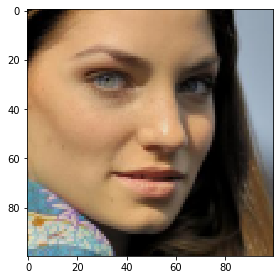

In [11]:
from skimage.io import imshow
imshow(imgs[0])
points[0]

In [23]:
limit = points.shape[1]//2
print(limit)

14


In [14]:
imgs.shape

(6000, 100, 100, 3)

In [0]:
def visualize_points(img,points):
  plt.figure()
  plt.imshow(img)
  cols,rows = img.shape[:2]
  figure = plt.gcf()
  axes = figure.gca()
  r = 1
  for i in range(limit):
    axes.add_artist((Circle(((points[i*2]+0.5)*cols,(points[i*2 + 1]+0.5)*rows),r,color='blue')))

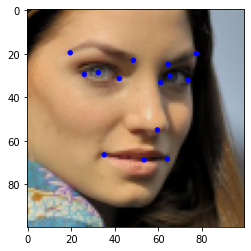

In [43]:
visualize_points(imgs[0],points[0])

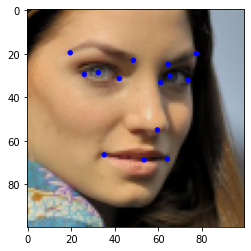

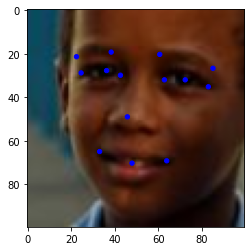

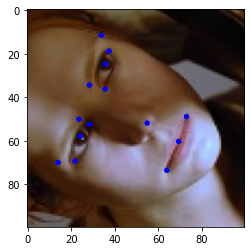

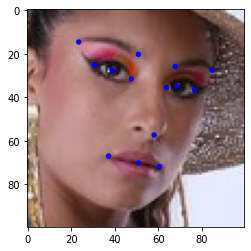

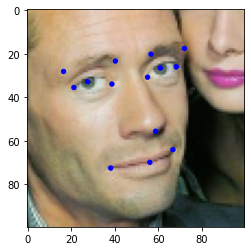

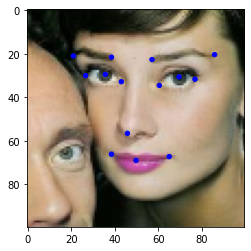

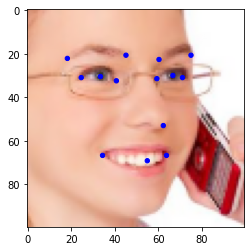

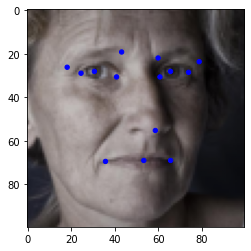

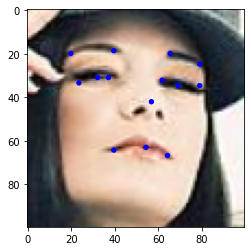

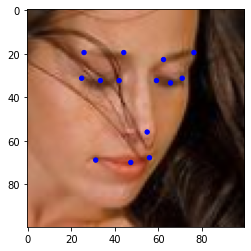

In [44]:
for i in range(10):
  visualize_points(imgs[i],points[i])

In [0]:
imgs_train,imgs_val,points_train,points_val = train_test_split(imgs,points,test_size=0.15)

In [48]:
imgs_train.shape

(5100, 100, 100, 3)

In [49]:
imgs_val.shape

(900, 100, 100, 3)

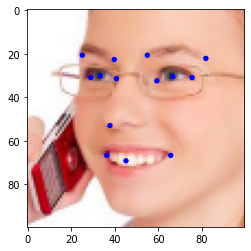

In [69]:
def flip_img(img, points):
    f_img = img[:,::-1]
    f_points = np.zeros(points.shape)
    indices = [3,2,1,0,9,8,7,6,5,4,10,13,12,11]
    for i in range(limit):
      f_points[2*i] = -1*points[2*indices[i]]
      f_points[2*i +1] = points[2*indices[i]+1]
    return f_img,f_points

f_img, f_points = flip_img(imgs[6], points[6])
visualize_points(f_img, f_points)

In [0]:
aug_imgs_train = []
aug_points_train = []
for i in range(imgs_train.shape[0]):
  flipped_image,flipped_points = flip_img(imgs_train[i],points_train[i])
  aug_imgs_train.append(imgs_train[i])
  aug_points_train.append(points_train[i])
  aug_imgs_train.append(flipped_image)
  aug_points_train.append(flipped_points)

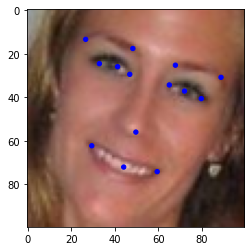

In [71]:
visualize_points(aug_imgs_train[4], aug_points_train[4])

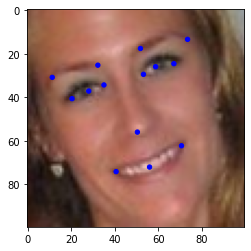

In [72]:
visualize_points(aug_imgs_train[5], aug_points_train[5])

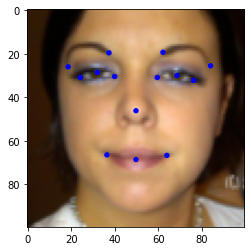

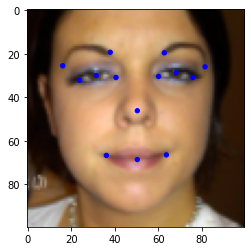

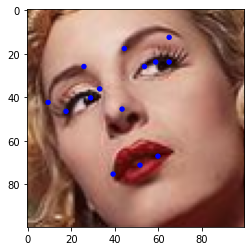

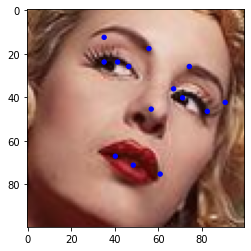

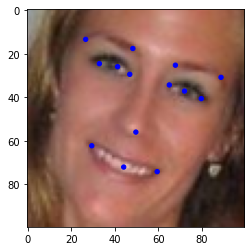

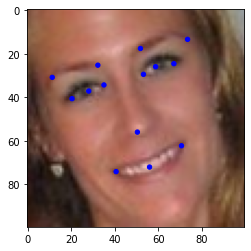

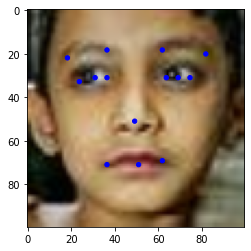

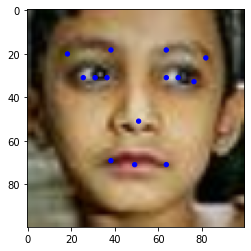

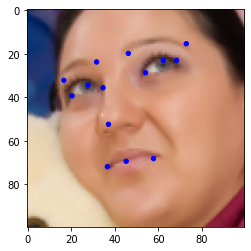

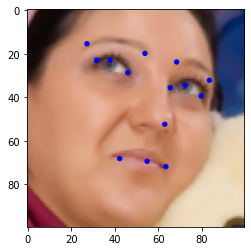

In [73]:
for i in range(10):
  visualize_points(aug_imgs_train[i], aug_points_train[i])

In [75]:
aug_imgs_train = np.array(aug_imgs_train)
aug_points_train = np.array(aug_points_train)
print(aug_imgs_train.shape)
print(aug_points_train.shape)

(10200, 100, 100, 3)
(10200, 28)


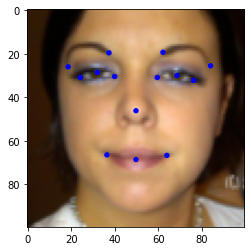

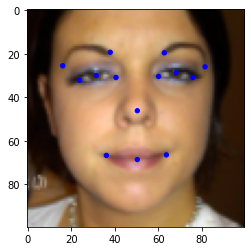

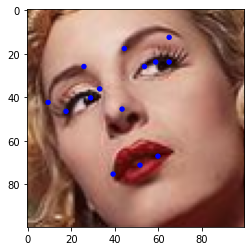

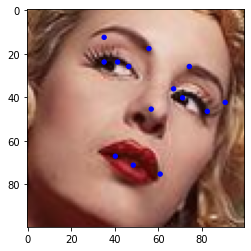

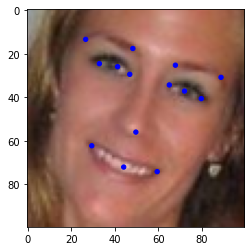

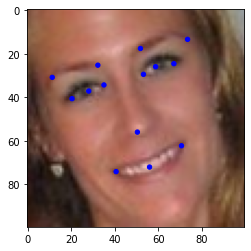

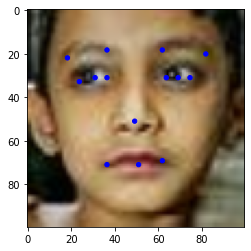

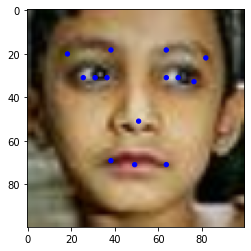

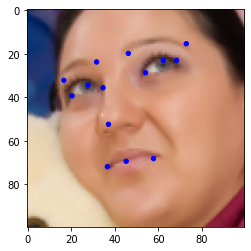

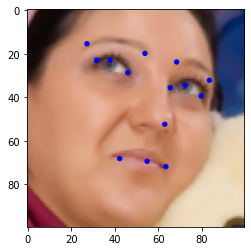

In [76]:
for i in range(10):
  visualize_points(aug_imgs_train[i], aug_points_train[i])

In [78]:
model = Sequential()
model.add(Conv2D(32,(3,3),input_shape=(100,100,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dropout(p=0.3))
model.add(Dense(128,activation='relu'))
model.add(Dropout(p=0.3))
model.add(Dense(aug_points_train.shape[1], activation='linear'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.3)`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.3)`
  if sys.path[0] == '':


In [79]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 98, 98, 32)        896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 49, 49, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 47, 47, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 21, 21, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 10, 10, 128)       0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 12800)            

In [0]:
optimizer = SGD()
model.compile(optimizer=optimizer,loss='mse',metrics=['mse'])

In [81]:
history = model.fit(aug_imgs_train,aug_points_train,verbose=1,epochs=10,batch_size=128,validation_data=(imgs_val,points_val),callbacks=[ModelCheckpoint('./weights')])

Train on 10200 samples, validate on 900 samples
Epoch 1/10
10200/10200 [==============================] - 10s 962us/step - loss: 0.0357 - mse: 0.0357 - val_loss: 0.0252 - val_mse: 0.0252
Epoch 2/10
10200/10200 [==============================] - 3s 321us/step - loss: 0.0248 - mse: 0.0248 - val_loss: 0.0170 - val_mse: 0.0170
Epoch 3/10
10200/10200 [==============================] - 3s 316us/step - loss: 0.0201 - mse: 0.0201 - val_loss: 0.0126 - val_mse: 0.0126
Epoch 4/10
10200/10200 [==============================] - 3s 314us/step - loss: 0.0172 - mse: 0.0172 - val_loss: 0.0102 - val_mse: 0.0102
Epoch 5/10
10200/10200 [==============================] - 3s 322us/step - loss: 0.0152 - mse: 0.0152 - val_loss: 0.0087 - val_mse: 0.0087
Epoch 6/10
10200/10200 [==============================] - 3s 319us/step - loss: 0.0138 - mse: 0.0138 - val_loss: 0.0077 - val_mse: 0.0077
Epoch 7/10
10200/10200 [==============================] - 3s 316us/step - loss: 0.0126 - mse: 0.0126 - val_loss: 0.0070 - v

In [0]:
model.save('keypoints.h5')

In [0]:
preds = model.predict(imgs_val)

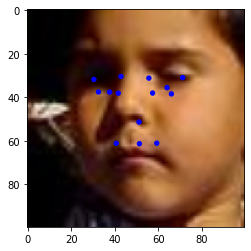

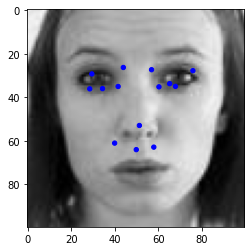

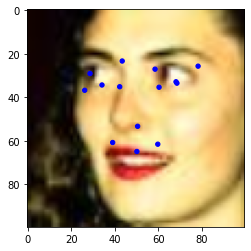

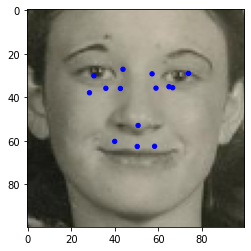

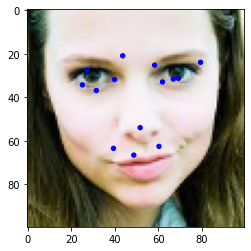

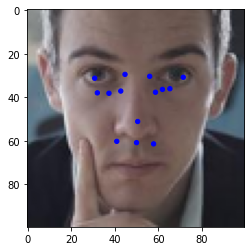

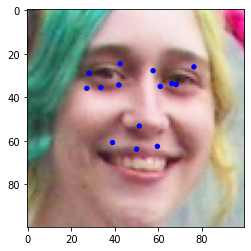

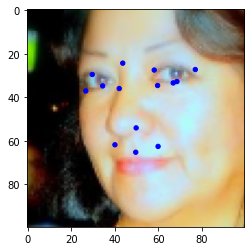

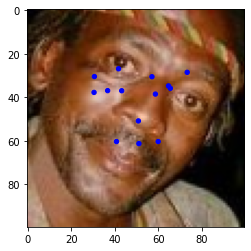

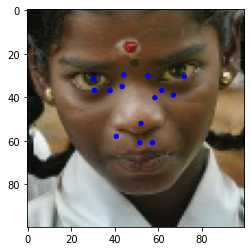

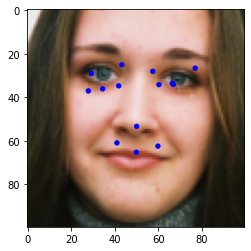

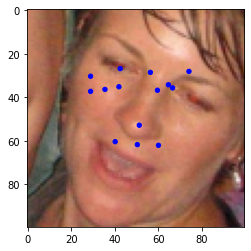

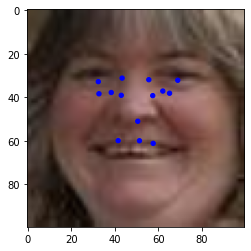

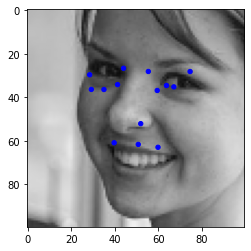

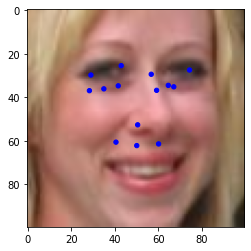

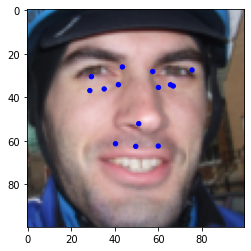

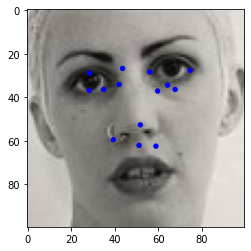

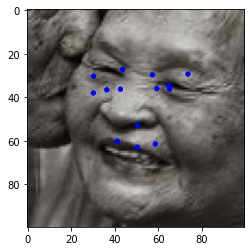

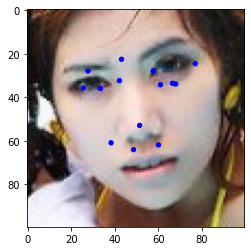

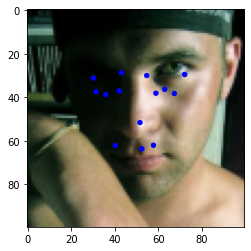

In [84]:
for i in range(20):
  visualize_points(imgs_val[i],preds[i])